# Importing Dataset and Libaries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import cufflinks as cf
%matplotlib inline
%matplotlib notebook

In [2]:
from plotly.offline import iplot
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
delivers = pd.read_csv('D:\datasets\deliveries.csv')

In [4]:
delivers.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [5]:
delivers.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [6]:
matches = pd.read_csv('D:\datasets\matches.csv')

In [7]:
matches.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [8]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
matches["result"].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [10]:
no_result =matches[matches['result'] == 'no result']

In [11]:
matches_result = matches[['team1','team2','winner']]
matches_result.head()

,team1,team2,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore


In [12]:
matches_result['lost'] = matches_result.apply(lambda x:   (x['team2'] if x['team1'] == x['winner'] else x['team1']), axis = 1)

In [13]:
matches_result.head(10)

,team1,team2,winner,lost
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,Gujarat Lions
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,Kolkata Knight Riders
7,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,Royal Challengers Bangalore
8,Delhi Daredevils,Rising Pune Supergiant,Delhi Daredevils,Rising Pune Supergiant
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,Sunrisers Hyderabad


In [14]:
wins = matches_result['winner'].value_counts()
wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [15]:
lost = matches_result['lost'].value_counts()
lost

Royal Challengers Bangalore    95
Delhi Daredevils               94
Kings XI Punjab                94
Kolkata Knight Riders          86
Mumbai Indians                 78
Rajasthan Royals               70
Chennai Super Kings            64
Sunrisers Hyderabad            50
Deccan Chargers                46
Pune Warriors                  33
Gujarat Lions                  17
Rising Pune Supergiants         9
Kochi Tuskers Kerala            8
Rising Pune Supergiant          6
Delhi Capitals                  6
Name: lost, dtype: int64

In [16]:
tie = matches[matches['result'] == 'tie']
tie

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
705,11146,2019,Delhi,30/03/19,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon,Marais Erasmus
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore


In [17]:
no_result.fillna('0')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,0,0,0,0,Feroz Shah Kotla,SS Hazare,RJ Tucker,0
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,0,0,0,0,M Chinnaswamy Stadium,JD Cloete,PG Pathak,0
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,0,0,0,0,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,0
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,0,0,0,0,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [18]:
wins.iplot(kind ='bar',xTitle ='Team',yTitle='Count',title='Winning Count')

# MI VS DC

In [19]:
def get_midc(team1,team2):
    teams =['Delhi Daredevils','Mumbai Indians']
    
    if team1 in teams and team2 in teams:
        return True
    else:
        return False


In [20]:
index = [ ]

for row in matches.iterrows():
    flag = get_midc(row[1]['team1'],row[1]['team2'])
    index.append(flag)
    
sum(index)

22

In [21]:
midd = matches[index]

In [22]:
midd.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN


In [23]:
midd['winner'].value_counts().iplot(kind='bar')

In [24]:
midd['toss_decision'].value_counts().iplot(kind ='bar')

In [25]:
corr =midd.corr()

<IPython.core.display.Javascript object>


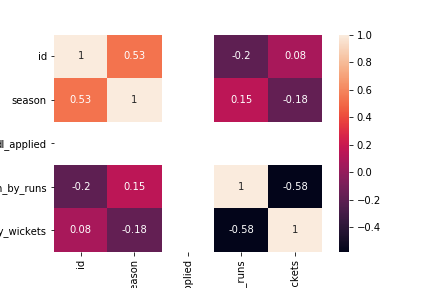

In [26]:
sns.heatmap(corr,annot = True)

In [27]:
midd.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN


In [28]:
cols_to_move = ['venue', 'winner']
new_cols = np.hstack((midd.columns.difference(cols_to_move), cols_to_move))
midd = midd.reindex(columns=new_cols)

In [29]:
midd.head(1)

,city,date,dl_applied,id,player_of_match,result,season,team1,team2,toss_decision,toss_winner,umpire1,umpire2,umpire3,win_by_runs,win_by_wickets,venue,winner
23,Mumbai,2017-04-22,0,24,MJ McClenaghan,normal,2017,Mumbai Indians,Delhi Daredevils,field,Delhi Daredevils,A Nand Kishore,S Ravi,NaN,14,0,Wankhede Stadium,Mumbai Indians


In [30]:
midd['venue'].value_counts()

Feroz Shah Kotla                                       9
Wankhede Stadium                                       7
SuperSport Park                                        1
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    1
Brabourne Stadium                                      1
Sharjah Cricket Stadium                                1
Buffalo Park                                           1
Dr DY Patil Sports Academy                             1
Name: venue, dtype: int64

In [31]:
midd.head(1)

,city,date,dl_applied,id,player_of_match,result,season,team1,team2,toss_decision,toss_winner,umpire1,umpire2,umpire3,win_by_runs,win_by_wickets,venue,winner
23,Mumbai,2017-04-22,0,24,MJ McClenaghan,normal,2017,Mumbai Indians,Delhi Daredevils,field,Delhi Daredevils,A Nand Kishore,S Ravi,NaN,14,0,Wankhede Stadium,Mumbai Indians


In [32]:
midd = midd.drop('id',axis =1)
midd = midd.drop('umpire1',axis =1)
midd = midd.drop('umpire2',axis =1)
midd = midd.drop('umpire3',axis =1)
midd = midd.drop('date',axis =1)

In [33]:
midd1 = pd.get_dummies(midd['city'])
midd1

,Centurion,Delhi,East London,Mumbai,Sharjah,Visakhapatnam
23,0,0,0,1,0,0
43,0,1,0,0,0,0
81,0,0,0,1,0,0
108,0,1,0,0,0,0
149,0,0,1,0,0,0
169,1,0,0,0,0,0
182,0,1,0,0,0,0
220,0,0,0,1,0,0
237,0,1,0,0,0,0
281,0,0,0,1,0,0


In [34]:
midd1 = midd1.drop('Visakhapatnam',axis =1)

In [35]:
midd1.head(1)

,Centurion,Delhi,East London,Mumbai,Sharjah
23,0,0,0,1,0


In [36]:
midd['Centurion'] = midd1['Centurion'].to_list()
midd['Delhi'] = midd1['Delhi'].to_list()
midd['Mumbai'] = midd1['Mumbai'].to_list()
midd['Sharjah'] = midd1['Sharjah'].to_list()
midd['East London'] = midd1['East London'].to_list()

In [37]:
midd.head(1)

,city,dl_applied,player_of_match,result,season,team1,team2,toss_decision,toss_winner,win_by_runs,win_by_wickets,venue,winner,Centurion,Delhi,Mumbai,Sharjah,East London
23,Mumbai,0,MJ McClenaghan,normal,2017,Mumbai Indians,Delhi Daredevils,field,Delhi Daredevils,14,0,Wankhede Stadium,Mumbai Indians,0,0,1,0,0


In [38]:
midd = midd.drop('player_of_match',axis =1)

midd = midd.drop('city',axis =1)


In [39]:
midd2 = pd.get_dummies(midd['toss_decision'])
midd2

,bat,field
23,0,1
43,0,1
81,0,1
108,0,1
149,1,0
169,0,1
182,0,1
220,1,0
237,1,0
281,0,1


In [40]:
midd['bat'] = midd2['bat'].to_list()
midd['field'] = midd2['field'].to_list()


In [41]:
midd =midd.drop('toss_decision',axis =1)
midd.head(1)

,dl_applied,result,season,team1,team2,toss_winner,win_by_runs,win_by_wickets,venue,winner,Centurion,Delhi,Mumbai,Sharjah,East London,bat,field
23,0,normal,2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,14,0,Wankhede Stadium,Mumbai Indians,0,0,1,0,0,0,1


In [42]:
midd3 = pd.get_dummies(midd['toss_winner'])
midd3

,Delhi Daredevils,Mumbai Indians
23,1,0
43,1,0
81,1,0
108,1,0
149,0,1
169,1,0
182,1,0
220,0,1
237,1,0
281,1,0


In [43]:
midd['Mumbai Indians'] = midd3['Mumbai Indians'].to_list()
midd['Delhi Daredevils'] = midd3['Delhi Daredevils'].to_list()


In [44]:
midd = midd.drop('toss_winner',axis =1)
midd.head(1)


,dl_applied,result,season,team1,team2,win_by_runs,win_by_wickets,venue,winner,Centurion,Delhi,Mumbai,Sharjah,East London,bat,field,Mumbai Indians,Delhi Daredevils
23,0,normal,2017,Mumbai Indians,Delhi Daredevils,14,0,Wankhede Stadium,Mumbai Indians,0,0,1,0,0,0,1,0,1


In [45]:
midd4 = pd.get_dummies(midd['result'])
midd4

,normal
23,1
43,1
81,1
108,1
149,1
169,1
182,1
220,1
237,1
281,1


In [46]:
midd['result'] = midd4['normal'].to_list()
midd.head(1)

,dl_applied,result,season,team1,team2,win_by_runs,win_by_wickets,venue,winner,Centurion,Delhi,Mumbai,Sharjah,East London,bat,field,Mumbai Indians,Delhi Daredevils
23,0,1,2017,Mumbai Indians,Delhi Daredevils,14,0,Wankhede Stadium,Mumbai Indians,0,0,1,0,0,0,1,0,1


In [47]:
midd5 = pd.get_dummies(midd['venue'])
midd5

,Brabourne Stadium,Buffalo Park,Dr DY Patil Sports Academy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Feroz Shah Kotla,Sharjah Cricket Stadium,SuperSport Park,Wankhede Stadium
23,0,0,0,0,0,0,0,1
43,0,0,0,0,1,0,0,0
81,0,0,1,0,0,0,0,0
108,0,0,0,0,1,0,0,0
149,0,1,0,0,0,0,0,0
169,0,0,0,0,0,0,1,0
182,0,0,0,0,1,0,0,0
220,1,0,0,0,0,0,0,0
237,0,0,0,0,1,0,0,0
281,0,0,0,0,0,0,0,1


In [48]:
midd5 = midd5.drop('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',axis =1)

In [49]:
midd5.head(1)

,Brabourne Stadium,Buffalo Park,Dr DY Patil Sports Academy,Feroz Shah Kotla,Sharjah Cricket Stadium,SuperSport Park,Wankhede Stadium
23,0,0,0,0,0,0,1


In [50]:
midd['Brabourne Stadium'] = midd5['Brabourne Stadium'].to_list()
midd['Buffalo Park'] = midd5['Buffalo Park'].to_list()
midd['Dr DY Patil Sports Academy'] = midd5['Dr DY Patil Sports Academy'].to_list()
midd['Feroz Shah Kotla'] = midd5['Feroz Shah Kotla'].to_list()
midd['Sharjah Cricket Stadium'] = midd5['Sharjah Cricket Stadium'].to_list()
midd['SuperSport Park'] = midd5['SuperSport Park'].to_list()
midd['Wankhede Stadium'] = midd5['Wankhede Stadium'].to_list()



midd.head(1)

,dl_applied,result,season,team1,team2,win_by_runs,win_by_wickets,venue,winner,Centurion,...,field,Mumbai Indians,Delhi Daredevils,Brabourne Stadium,Buffalo Park,Dr DY Patil Sports Academy,Feroz Shah Kotla,Sharjah Cricket Stadium,SuperSport Park,Wankhede Stadium
23,0,1,2017,Mumbai Indians,Delhi Daredevils,14,0,Wankhede Stadium,Mumbai Indians,0,...,1,0,1,0,0,0,0,0,0,1


In [51]:
midd.columns

Index(['dl_applied', 'result', 'season', 'team1', 'team2', 'win_by_runs',
       'win_by_wickets', 'venue', 'winner', 'Centurion', 'Delhi', 'Mumbai',
       'Sharjah', 'East London', 'bat', 'field', 'Mumbai Indians',
       'Delhi Daredevils', 'Brabourne Stadium', 'Buffalo Park',
       'Dr DY Patil Sports Academy', 'Feroz Shah Kotla',
       'Sharjah Cricket Stadium', 'SuperSport Park', 'Wankhede Stadium'],
      dtype='object')

In [52]:
midd_result = midd[['team1','team2','winner']]
midd_result.head()

,team1,team2,winner
23,Mumbai Indians,Delhi Daredevils,Mumbai Indians
43,Mumbai Indians,Delhi Daredevils,Mumbai Indians
81,Mumbai Indians,Delhi Daredevils,Mumbai Indians
108,Mumbai Indians,Delhi Daredevils,Delhi Daredevils
149,Mumbai Indians,Delhi Daredevils,Delhi Daredevils


In [53]:
midd_result.iplot(kind='bar')

In [54]:
midd.head()

,dl_applied,result,season,team1,team2,win_by_runs,win_by_wickets,venue,winner,Centurion,...,field,Mumbai Indians,Delhi Daredevils,Brabourne Stadium,Buffalo Park,Dr DY Patil Sports Academy,Feroz Shah Kotla,Sharjah Cricket Stadium,SuperSport Park,Wankhede Stadium
23,0,1,2017,Mumbai Indians,Delhi Daredevils,14,0,Wankhede Stadium,Mumbai Indians,0,...,1,0,1,0,0,0,0,0,0,1
43,0,1,2017,Mumbai Indians,Delhi Daredevils,146,0,Feroz Shah Kotla,Mumbai Indians,0,...,1,0,1,0,0,0,1,0,0,0
81,0,1,2008,Mumbai Indians,Delhi Daredevils,29,0,Dr DY Patil Sports Academy,Mumbai Indians,0,...,1,0,1,0,0,1,0,0,0,0
108,0,1,2008,Mumbai Indians,Delhi Daredevils,0,5,Feroz Shah Kotla,Delhi Daredevils,0,...,1,0,1,0,0,0,1,0,0,0
149,0,1,2009,Mumbai Indians,Delhi Daredevils,0,7,Buffalo Park,Delhi Daredevils,0,...,0,1,0,0,1,0,0,0,0,0


In [55]:
midd6 = pd.get_dummies(midd['team1'])
midd6

,Delhi Daredevils,Mumbai Indians
23,0,1
43,0,1
81,0,1
108,0,1
149,0,1
169,0,1
182,0,1
220,0,1
237,1,0
281,0,1


In [56]:
midd['Mumbai Indians'] = midd6['Mumbai Indians'].to_list()
midd['Delhi Daredevils'] = midd6['Delhi Daredevils'].to_list()

In [57]:
midd.head(1)

,dl_applied,result,season,team1,team2,win_by_runs,win_by_wickets,venue,winner,Centurion,...,field,Mumbai Indians,Delhi Daredevils,Brabourne Stadium,Buffalo Park,Dr DY Patil Sports Academy,Feroz Shah Kotla,Sharjah Cricket Stadium,SuperSport Park,Wankhede Stadium
23,0,1,2017,Mumbai Indians,Delhi Daredevils,14,0,Wankhede Stadium,Mumbai Indians,0,...,1,1,0,0,0,0,0,0,0,1


In [58]:
midd = midd.drop(['team1','team2'],axis =1)

In [59]:
midd.columns

Index(['dl_applied', 'result', 'season', 'win_by_runs', 'win_by_wickets',
       'venue', 'winner', 'Centurion', 'Delhi', 'Mumbai', 'Sharjah',
       'East London', 'bat', 'field', 'Mumbai Indians', 'Delhi Daredevils',
       'Brabourne Stadium', 'Buffalo Park', 'Dr DY Patil Sports Academy',
       'Feroz Shah Kotla', 'Sharjah Cricket Stadium', 'SuperSport Park',
       'Wankhede Stadium'],
      dtype='object')

In [60]:
midd.head(3)

,dl_applied,result,season,win_by_runs,win_by_wickets,venue,winner,Centurion,Delhi,Mumbai,...,field,Mumbai Indians,Delhi Daredevils,Brabourne Stadium,Buffalo Park,Dr DY Patil Sports Academy,Feroz Shah Kotla,Sharjah Cricket Stadium,SuperSport Park,Wankhede Stadium
23,0,1,2017,14,0,Wankhede Stadium,Mumbai Indians,0,0,1,...,1,1,0,0,0,0,0,0,0,1
43,0,1,2017,146,0,Feroz Shah Kotla,Mumbai Indians,0,1,0,...,1,1,0,0,0,0,1,0,0,0
81,0,1,2008,29,0,Dr DY Patil Sports Academy,Mumbai Indians,0,0,1,...,1,1,0,0,0,1,0,0,0,0


In [61]:
delivers.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [62]:
delivers.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [63]:
delivers['batsman'].value_counts()[:20].iplot(kind='bar')

In [64]:
delivers['bowler'].value_counts()[:20].iplot(kind='bar')

# Rohit Sharma against other teams

In [68]:
name = 'RG Sharma'
batsman = delivers[delivers['batsman'] == name]
batsman.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
275,2,1,Mumbai Indians,Rising Pune Supergiant,5,3,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [72]:
rohit_dc = batsman[['batting_team','bowling_team','batsman','total_runs']]
rohit_dc.head()

,batting_team,bowling_team,batsman,total_runs
275,Mumbai Indians,Rising Pune Supergiant,RG Sharma,0
276,Mumbai Indians,Rising Pune Supergiant,RG Sharma,1
278,Mumbai Indians,Rising Pune Supergiant,RG Sharma,1
279,Mumbai Indians,Rising Pune Supergiant,RG Sharma,1
285,Mumbai Indians,Rising Pune Supergiant,RG Sharma,0


# Rabada

In [66]:
name = 'K Rabada'
bowler = delivers[delivers['bowler'] == name]

bowler = bowler[['bowler','dismissal_kind']].reset_index().drop(['index'], axis=1)

In [67]:
bowler

,bowler,dismissal_kind
0,K Rabada,NaN
1,K Rabada,NaN
2,K Rabada,NaN
3,K Rabada,NaN
4,K Rabada,NaN
...,...,...
429,K Rabada,caught
430,K Rabada,NaN
431,K Rabada,NaN
432,K Rabada,NaN


In [77]:
for (columnName, columnData) in delivers[['inning','batting_team','over','ball','is_super_over','wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','batsman_runs','extra_runs','total_runs','dismissal_kind']].iteritems(): 
    print('Deliveries - Column Name:', columnName) 
    print('Unique Values:', pd.Series(columnData.values).unique()) 
print("\n---------------------------------\n")
for (columnName, columnData) in matches[['season','city','team1','toss_decision','result','dl_applied','venue']].iteritems(): 
    print('Matches - Column Name:', columnName) 
    print('Unique Values:', pd.Series(columnData.values).unique()) 

Deliveries - Column Name: inning
Unique Values: [1 2 3 4 5]
Deliveries - Column Name: batting_team
Unique Values: ['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']
Deliveries - Column Name: over
Unique Values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Deliveries - Column Name: ball
Unique Values: [1 2 3 4 5 6 7 8 9]
Deliveries - Column Name: is_super_over
Unique Values: [0 1]
Deliveries - Column Name: wide_runs
Unique Values: [0 2 1 5 3 4]
Deliveries - Column Name: bye_runs
Unique Values: [0 1 4 2 3]
Deliveries - Column Name: legbye_runs
Unique Values: [0 1 2 5 3 4]
Deliveries - Column Name: noball_runs
Unique Values: [0 1 2 5 3]
Deliveries - Column Name: penalty_runs
Unique Values: [0 5]
Deliveries - C